# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
study_df.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [162]:
# Checking the number of mice.
mice_count = len(study_df['Mouse ID'].unique())
mice_count

249

In [163]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mouse = study_df.loc[study_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"]
dup_mouse


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [164]:
# Optional: Get all the data for the duplicate mouse ID. 

# option 1: All data of the duplicates alone, not including original
# study_df.loc[study_df.duplicated(subset=["Mouse ID", "Timepoint"]),:]

# option 2: All data of every mouse that had a duplicate including original
study_df.loc[study_df["Mouse ID"] == 'g989']



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [165]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dup_df = pd.DataFrame(study_df.loc[study_df.duplicated(subset=["Mouse ID", "Timepoint"])==False])
no_dup_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [166]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean_df = len(no_dup_df["Mouse ID"].unique())
mouse_count_clean_df

249

## Summary Statistics

In [167]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = pd.DataFrame({
    "Mean Tumor Volume":no_dup_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),
    "Median Tumor Volume":no_dup_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),
    "Variance":no_dup_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),
    "Standard Deviation":no_dup_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(),
    "Standard Error Measurement":no_dup_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
})
summary_stats



,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,Standard Error Measurement
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [168]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
no_dup_df.groupby(no_dup_df["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Mice in all Drug Trials'}, xlabel='Drug Regimen', ylabel='Total Number of Mice'>

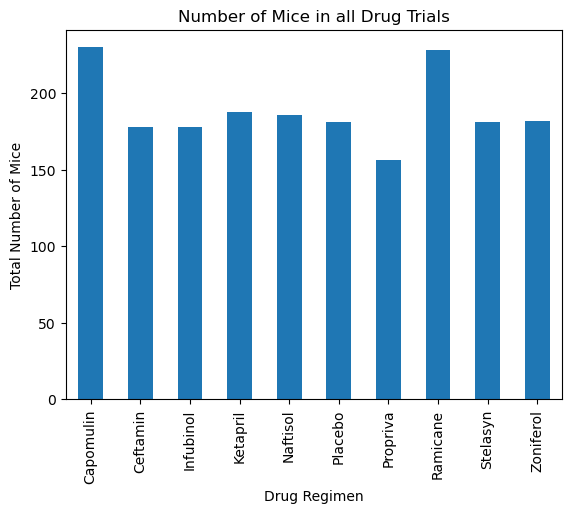

In [169]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
measurements = no_dup_df.groupby("Drug Regimen")["Timepoint"].count()
measurements.plot(kind='bar', ylabel="Total Number of Mice", title="Number of Mice in all Drug Trials")

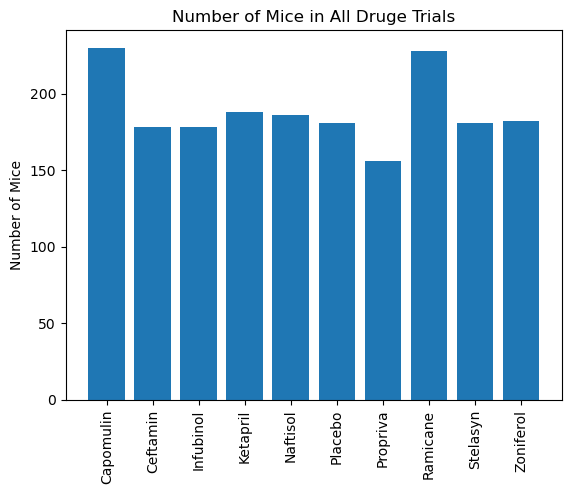

In [170]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#measuremets contain a dictionary with drug names as keys and total measurements taken as key values
measurements
plt.bar(measurements.keys(), measurements)
plt.xticks(rotation=90)
plt.title("Number of Mice in All Druge Trials")
plt.ylabel("Number of Mice")
plt.show()


<AxesSubplot:title={'center':'Sex Distribution During Drug Trials'}, ylabel='Mouse ID'>

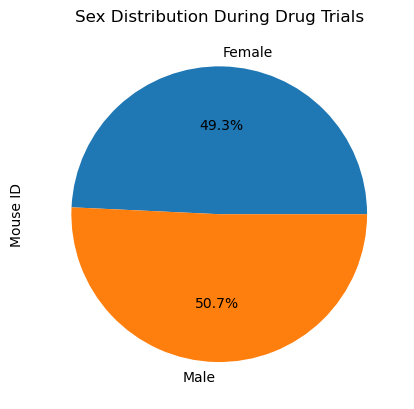

In [171]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = no_dup_df.groupby("Sex")["Mouse ID"].count()
sex_distribution.plot(kind='pie', autopct='%1.1f%%', title= "Sex Distribution During Drug Trials")


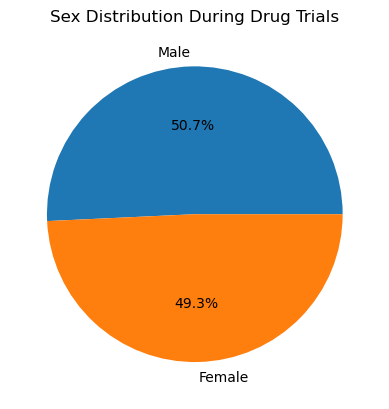

In [172]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = "Male", "Female"
sizes = no_dup_df.loc[no_dup_df["Sex"]=="Male", "Mouse ID"].count(), no_dup_df.loc[no_dup_df["Sex"]=="Female", "Mouse ID"].count()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Sex Distribution During Drug Trials")
plt.show()


## Quartiles, Outliers and Boxplots

In [173]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


# Alternatively, I the loc function looks for max timepoints in each mouse ID, then returns volume under that condition

final_tumor_vols = no_dup_df.loc[no_dup_df.groupby("Mouse ID")["Timepoint"].max(),["Tumor Volume (mm3)", "Mouse ID", "Drug Regimen"]]
final_tumor_vols

,Tumor Volume (mm3),Mouse ID,Drug Regimen
45,35.569399,g791,Ramicane
45,35.569399,g791,Ramicane
45,35.569399,g791,Ramicane
45,35.569399,g791,Ramicane
30,45.000000,m601,Capomulin
...,...,...,...
10,45.000000,s185,Capomulin
45,35.569399,g791,Ramicane
45,35.569399,g791,Ramicane
45,35.569399,g791,Ramicane


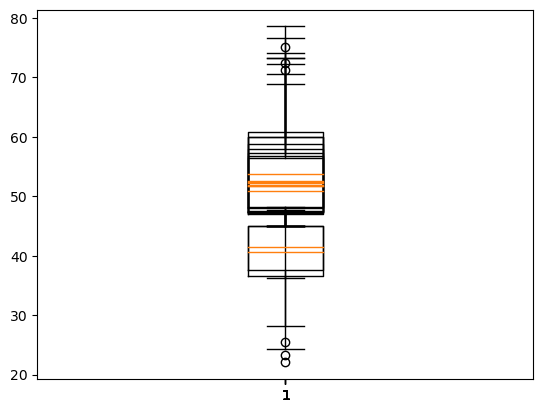

In [181]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = [drug for drug in no_dup_df["Drug Regimen"].unique()]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    p= no_dup_df.loc[no_dup_df["Drug Regimen"]==drug, ["Tumor Volume (mm3)"]]
    plt.boxplot(p)
    # add subset 

    
    # Determine outliers using upper and lower bounds
    

In [175]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [176]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [177]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [178]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

